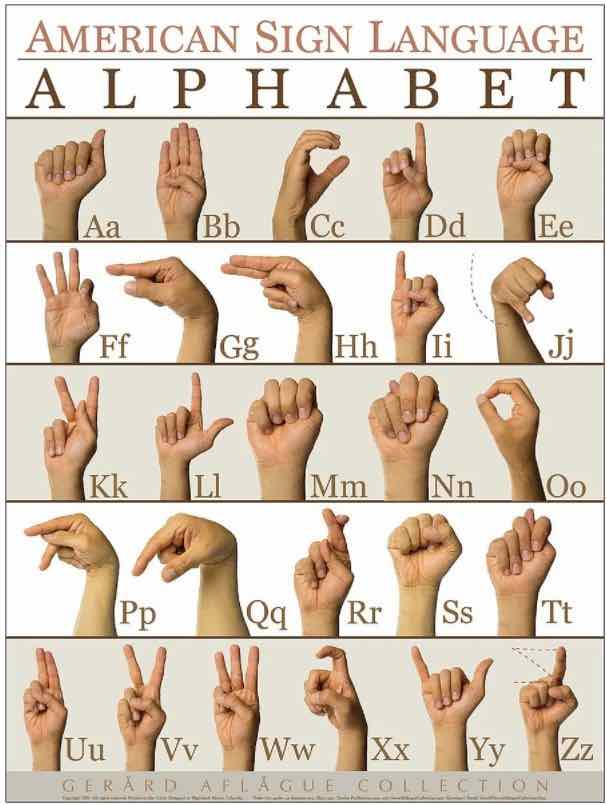

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 7.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.13.0
    Uninstalling tensorflow-hub-0.13.0:
      Successfully uninstalled tensorfl

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflowjs as tfjs

import pandas as pd


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)


from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import csv
import requests

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Download the CSV file from the provided link
url1 = 'https://raw.githubusercontent.com/Vaxier8/vaxier8.github.io/main/trainFinalNum.csv'
url2 = 'https://raw.githubusercontent.com/Vaxier8/vaxier8.github.io/main/test.csv'
response1 = requests.get(url1)
response2 = requests.get(url2)

# Read the CSV file and remove lines with more than 43 fields and exclude rows with missing values
rows = csv.reader(response1.text.strip().split('\n'))
cleaned_rows = []
for row in rows:
    if len(row) <= 43 and all(row):
        cleaned_rows.append(row)


# Write the cleaned data to a new file
with open('trainFinal_cleaned.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_rows)

# Read the cleaned data into a pandas DataFrame object
abalone_train = pd.read_csv('trainFinal_cleaned.csv', names=["label", "X1", "Y1", "X2", "Y2", "X3", "Y3", "X4", "Y4", "X5", "Y5", "X6", "Y6", "X7", "Y7", "X8", "Y8", "X9", "Y9", "X10", "Y10", "X11", "Y11", "X12", "Y12", "X13", "Y13", "X14", "Y14", "X15", "Y15", "X16", "Y16", "X17", "Y17", "X18", "Y18", "X19", "Y19", "X20", "Y20", "X21", "Y21"])
y_train = abalone_train.pop("label")

x_test = pd.read_csv(url2, names=["label", "X1", "Y1", "X2", "Y2", "X3", "Y3", "X4", "Y4", "X5", "Y5", "X6", "Y6", "X7", "Y7", "X8", "Y8", "X9", "Y9", "X10", "Y10", "X11", "Y11", "X12", "Y12", "X13", "Y13", "X14", "Y14", "X15", "Y15", "X16", "Y16", "X17", "Y17", "X18", "Y18", "X19", "Y19", "X20", "Y20", "X21", "Y21"])
y_test = x_test.pop("label")

tf.convert_to_tensor(abalone_train, dtype=tf.float32)
tf.convert_to_tensor(x_test, dtype=tf.float32)


<tf.Tensor: shape=(8, 42), dtype=float32, numpy=
array([[0.477, 0.632, 0.419, 0.641, 0.378, 0.666, 0.355, 0.689, 0.342,
        0.688, 0.361, 0.617, 0.357, 0.62 , 0.338, 0.618, 0.319, 0.613,
        0.398, 0.607, 0.372, 0.734, 0.365, 0.809, 0.365, 0.859, 0.444,
        0.629, 0.415, 0.757, 0.426, 0.757, 0.441, 0.731, 0.483, 0.657,
        0.457, 0.766, 0.459, 0.77 , 0.465, 0.743],
       [0.469, 0.634, 0.408, 0.648, 0.368, 0.674, 0.347, 0.696, 0.341,
        0.691, 0.354, 0.62 , 0.356, 0.619, 0.338, 0.618, 0.319, 0.616,
        0.394, 0.607, 0.372, 0.731, 0.363, 0.801, 0.361, 0.847, 0.443,
        0.625, 0.415, 0.755, 0.425, 0.752, 0.441, 0.72 , 0.483, 0.652,
        0.458, 0.761, 0.459, 0.762, 0.466, 0.73 ],
       [0.477, 0.609, 0.432, 0.693, 0.352, 0.755, 0.293, 0.802, 0.261,
        0.861, 0.292, 0.678, 0.215, 0.684, 0.243, 0.685, 0.285, 0.684,
        0.289, 0.619, 0.203, 0.61 , 0.241, 0.622, 0.286, 0.63 , 0.298,
        0.56 , 0.215, 0.541, 0.241, 0.563, 0.282, 0.577, 0.316, 0.5 

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

model.fit(
    abalone_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback]
)

Epoch 1/1000
202/202 [==============================] - 2s 4ms/step - loss: 3.2825 - accuracy: 0.0778 - val_loss: 3.2263 - val_accuracy: 0.0000e+00
Epoch 2/1000
202/202 [==============================] - 1s 4ms/step - loss: 3.1456 - accuracy: 0.1034 - val_loss: 3.0153 - val_accuracy: 0.1250
Epoch 3/1000
202/202 [==============================] - 1s 3ms/step - loss: 3.0034 - accuracy: 0.1413 - val_loss: 2.7254 - val_accuracy: 0.1250
Epoch 4/1000
202/202 [==============================] - 1s 3ms/step - loss: 2.8779 - accuracy: 0.1638 - val_loss: 2.5219 - val_accuracy: 0.5000
Epoch 5/1000
202/202 [==============================] - 1s 3ms/step - loss: 2.7937 - accuracy: 0.1878 - val_loss: 2.3636 - val_accuracy: 0.3750
Epoch 6/1000
202/202 [==============================] - 1s 3ms/step - loss: 2.7316 - accuracy: 0.1983 - val_loss: 2.2473 - val_accuracy: 0.7500
Epoch 7/1000
202/202 [==============================] - 1s 5ms/step - loss: 2.6742 - accuracy: 0.2156 - val_loss: 2.1201 - val_accur

In [ ]:
checkpoint_path = "/content/training"
tfjs.converters.save_keras_model(model, checkpoint_path)

In [ ]:
model.save_weights('/content/training/asl_checkpoint')


In [ ]:
model.save('ASLmodel')

2/2 [==============================] - 0s 8ms/step - loss: 14.0083 - accuracy: 0.1250
[14.008272171020508, 0.125]


NameError: ignored